# Importing Libraries 

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,recall_score,precision_score,f1_score,log_loss,roc_auc_score,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
pd.set_option("display.max_columns",30)
import warnings
warnings.filterwarnings("ignore")

# Project 
## Plant Disease Classification Model

In [109]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\plant_disease_dataset.csv")

# Data Info

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      10000 non-null  float64
 1   humidity         10000 non-null  float64
 2   rainfall         10000 non-null  float64
 3   soil_pH          10000 non-null  float64
 4   disease_present  10000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


In [111]:
df.head()

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


In [112]:
df.shape

(10000, 5)

# Data Cleaning & Handling 

In [113]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

# Machine Learning

# K Nearest Classifier 

              precision    recall  f1-score   support

           0       0.84      0.56      0.67      1518
           1       0.32      0.65      0.43       482

    accuracy                           0.58      2000
   macro avg       0.58      0.61      0.55      2000
weighted avg       0.71      0.58      0.61      2000



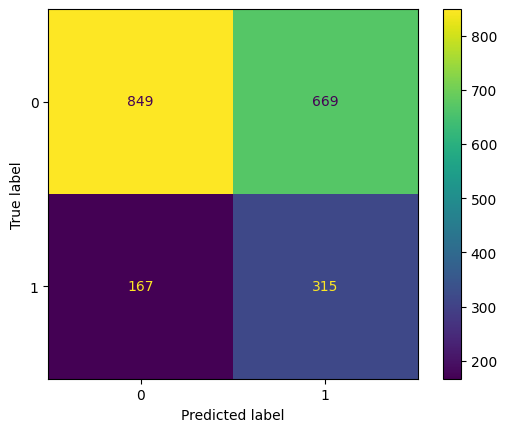

In [114]:
x=df.drop(columns=["disease_present"])
y=df["disease_present"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

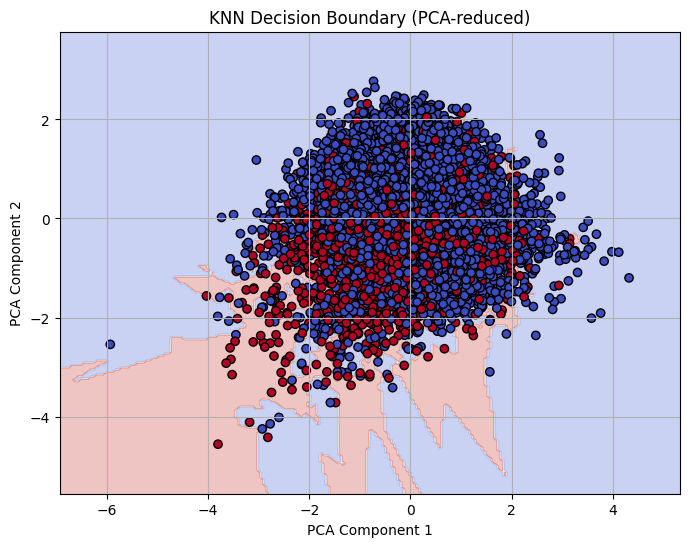

In [115]:
from sklearn.decomposition import PCA
X = df.drop('disease_present', axis=1)
y = df['disease_present']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pca, y)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("KNN Decision Boundary (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()